# Visualizing Chipotle's Data

### Step 1. 필요한 라이브러리 들을 import 하세요

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. 다음 주소의 파일을 import 하세요 [address](https://raw.githubusercontent.com/myoh0623/dataset/main/chipotle.tsv).

In [3]:
url = "https://raw.githubusercontent.com/myoh0623/dataset/main/chipotle.tsv"

### Step 3. chipo 라는 변수에 DataFrame 을 할당하세요

In [7]:
# sep='\t' 참고
chipo = pd.read_csv(url, sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. DataFrae 의 첫 10줄을 표시하세요

In [8]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. 구매 상위 5개 품목의 히스토그램을 생성하세요
- collections 의 Counter 를 사용하세요
- quantity 는 제외하고 item_name 이 나온 갯수로만

In [11]:
item_list = chipo.groupby("item_name")["quantity"].sum()
top_sales = item_list.sort_values(ascending=False).head(5)

In [12]:
top_sales

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

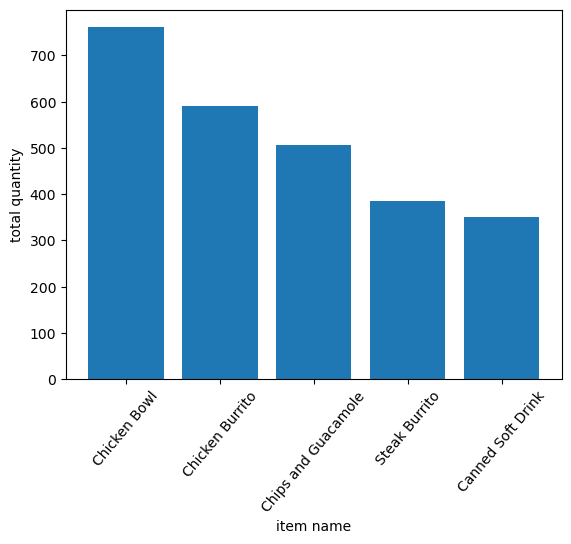

In [16]:
plt.bar(top_sales.index, top_sales.values)
plt.xlabel("item name")
plt.ylabel("total quantity")
plt.xticks(rotation=50)
plt.show()

In [25]:
from collections import Counter
item_count = Counter(chipo.item_name)
df = pd.DataFrame.from_dict(item_count, orient="index")
df.head()

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


In [27]:
top_sales

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

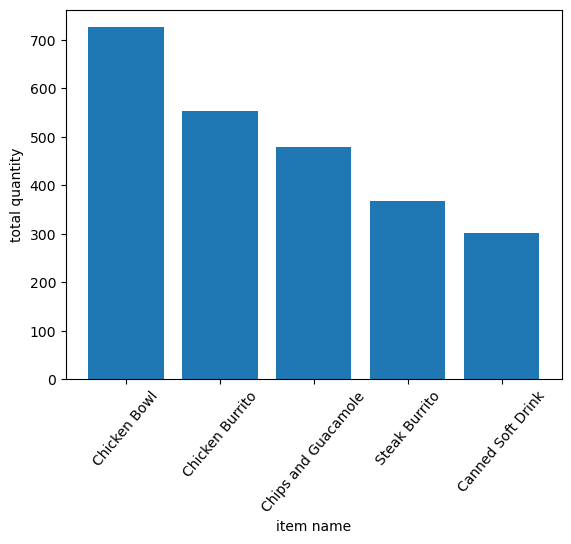

In [28]:
df_top_sales = df[0].sort_values(ascending=False).head(5)
plt.bar(df_top_sales.index, df_top_sales.values)
plt.xlabel("item name")
plt.ylabel("total quantity")
plt.xticks(rotation=50)
plt.show()

### Step 6. 1회 주문가격당 주문양을 산점도를 생성하여 
- order_id 가 1회 주문 입니다. 
- 주문 갯수는 1회 주문의 양 입니다.
#### Hint: 주문 가격은 X축, 주문 횟수는Y축

In [33]:
chipo.item_price = [float(price[1:-1]) for price in chipo.item_price]

In [34]:
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [32]:
chipo.item_price[0]

'$2.39 '

In [36]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [37]:
orders = chipo.groupby("order_id").sum()

In [43]:
orders_under_150 = orders[orders["item_price"] < 150]

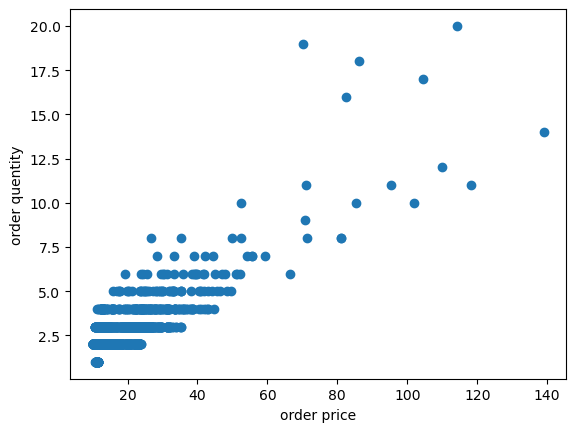

In [44]:
plt.scatter(orders_under_150.item_price, orders_under_150.quantity)
plt.xlabel("order price")
plt.ylabel("order quentity")
plt.show()

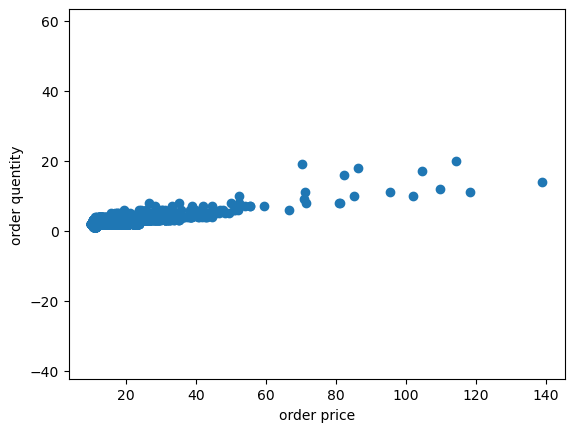

In [45]:
plt.scatter(orders_under_150.item_price, orders_under_150.quantity)
plt.xlabel("order price")
plt.ylabel("order quentity")
plt.axis("equal")
plt.show()